# Special Topic in Data Analytics

## Project : Spotify Popularity Visualization and Analysis

#### Team Members:

- Sisir Ghimire Chettri (300340871)
- Simrik Rijal (300340875)

# Data Loading

In [931]:
# !pip install seaborn
# !pip install sklearn
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# So that the plot will be saved within the Jupyter Notebook
%matplotlib inline

# Changing the default number of Rows and Columns to be Displayed
pd.set_option('display.max_rows', 30)
pd.set_option('display.max.columns', None)

# Load the Data Set
df = pd.read_csv('spotify-dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Data Preprocessing

In [932]:
# missing_vals = pd.DataFrame(missing_val)
# missing_vals
# df_unique = df.drop_duplicates(['track_id', 'artists', 'album_name', 'track_name'])
# df_unique.shape

# df.loc[df.duplicated(['track_name', 'danceability', 'energy', 'key', 'loudness', 'mode']), :].sort_values(by='artists', ascending=False)
df.drop([65900], inplace=True)
df_unique = df.drop_duplicates(['track_name', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness'], keep=False)
df_unique.shape

(71325, 21)

In [933]:
display(df[0:2].T)

,0,1
Unnamed: 0,0,1
track_id,5SuOikwiRyPMVoIQDJUgSV,4qPNDBW1i3p13qLCt0Ki3A
artists,Gen Hoshino,Ben Woodward
album_name,Comedy,Ghost (Acoustic)
track_name,Comedy,Ghost - Acoustic
popularity,73,55
duration_ms,230666,149610
explicit,False,False
danceability,0.676,0.42
energy,0.461,0.166


In [934]:
df_final = df_unique.drop(columns = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])
df_final

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4,acoustic
8,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4,acoustic
10,74,244800,False,0.627,0.3630,8,-8.127,1,0.0291,0.279,0.000000,0.0928,0.3010,99.905,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.381,0.000000,0.2700,0.4130,135.960,4,world-music


### Getting the dummies of track genre

In [935]:
pd.get_dummies(df_final)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_ska,track_genre_sleep,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,74,244800,False,0.627,0.3630,8,-8.127,1,0.0291,0.279,0.000000,0.0928,0.3010,99.905,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,..

# Exploratory Data Analysis (EDA)

In [936]:
# Calculate mean of popularity score based on genres

pop_score_genre = df_final.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).head(10)

pop_genre_score = pop_score_genre.to_frame().reset_index()
pop_genre_score.popularity

0    59.093750
1    58.653595
2    56.725552
3    55.332790
4    55.148760
5    54.736508
6    53.142549
7    52.083333
8    51.618333
9    51.360248
Name: popularity, dtype: float64

## Most Popular Genre [ TOP 10 ]

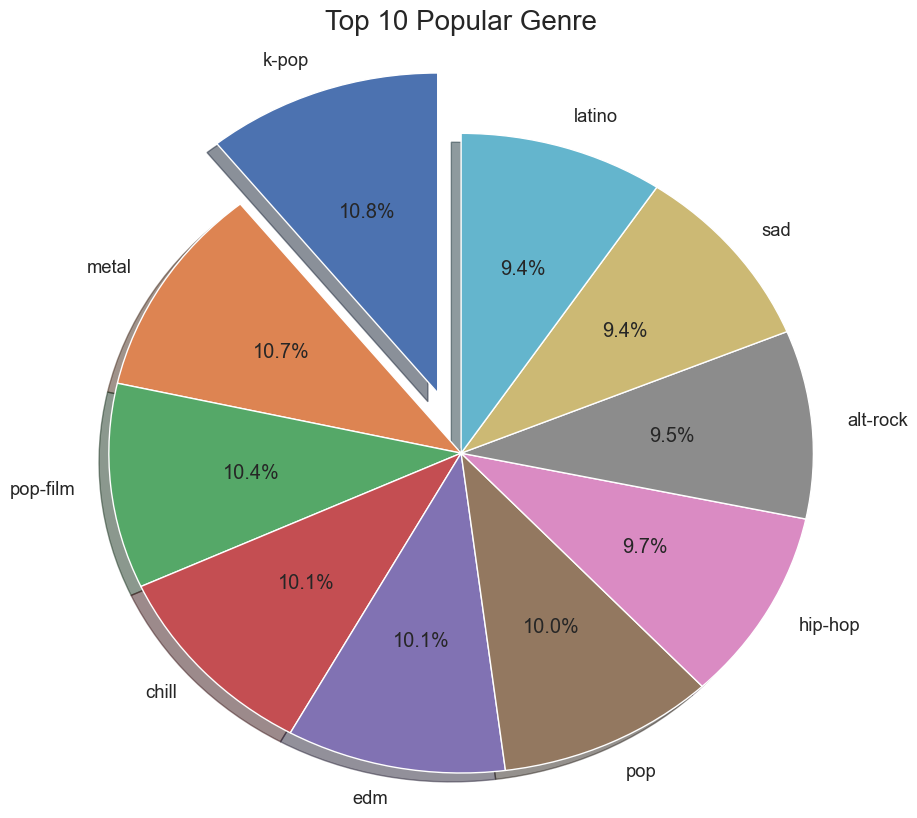

In [937]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

plt.figure(figsize=(10,10))
plt.pie(pop_genre_score['popularity'], labels=pop_genre_score.track_genre, 
        shadow=True, startangle=90, explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0], autopct='%1.1f%%')
plt.axis('auto') 
plt.title('Top 10 Popular Genre',fontsize = 20)
plt.show()

# Most Popular Artists [ TOP 10 ]

<AxesSubplot: title={'center': 'Top 10 Popular Artists'}, xlabel='popularity', ylabel='artists'>

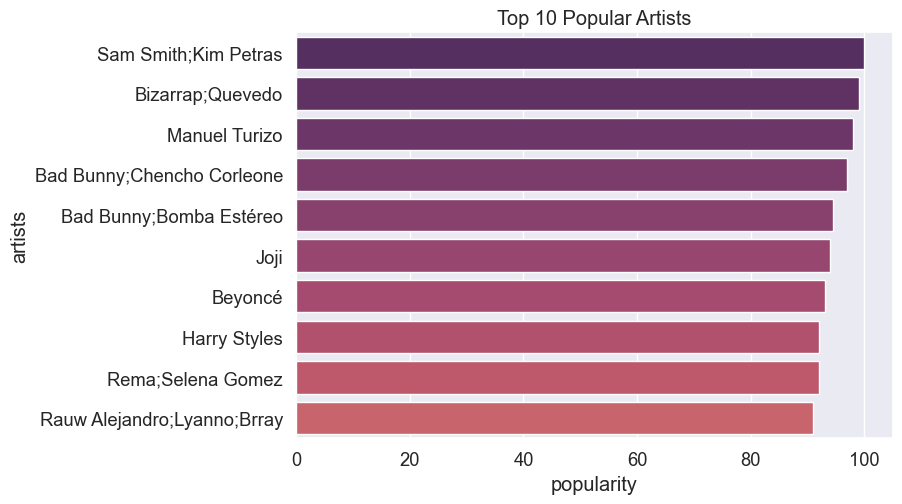

In [938]:
# Calculate mean of popularity score based on artists

pop_score_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending = False).head(10)
pop_score_artists = pop_score_artists.to_frame().reset_index()
palette = sns.color_palette("flare",n_colors=15)
palette.reverse()

plt.title('Top 10 Popular Artists')
sns.barplot(data=pop_score_artists, x="popularity", y="artists", palette=palette, orient = 'h')


## Duration of Song in Top 30 Genres

<AxesSubplot: title={'center': 'Duration of songs in different genre'}, xlabel='duration_ms', ylabel='track_genre'>

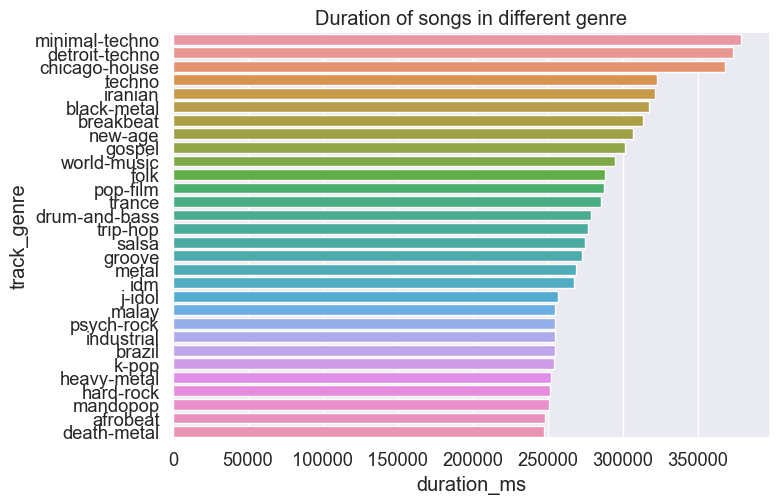

In [939]:
genre = df_final.groupby('track_genre')['duration_ms'].mean().sort_values(ascending = False).head(30)
genre = genre.to_frame().reset_index()
plt.title('Duration of songs in different genre')
sns.barplot(y=genre['track_genre'], x=genre['duration_ms'], data=genre)

## Most Popular Tracks [ TOP 10 ]

<AxesSubplot: title={'center': 'Top 10 Popular Tracks'}, xlabel='popularity', ylabel='track_name'>

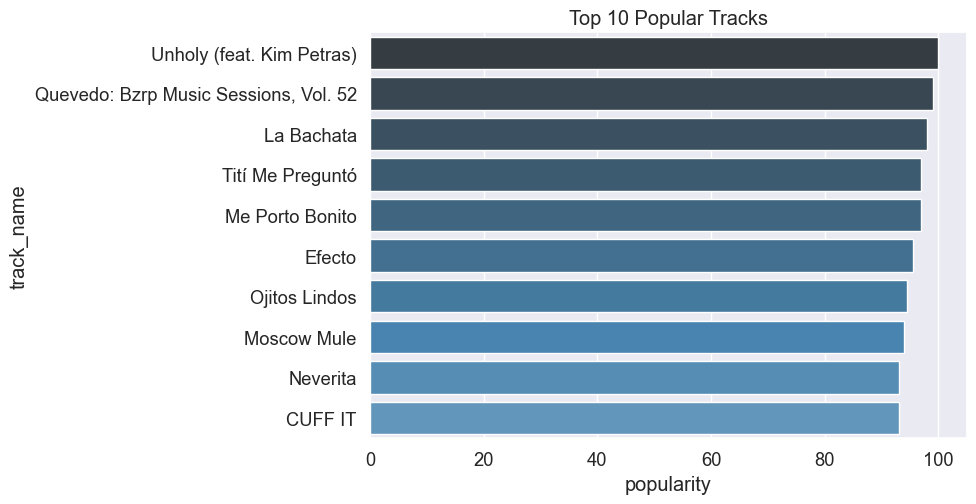

In [940]:
# Calculate mean of popularity score based on tracks

pop_score_track = df.groupby('track_name')['popularity'].mean().sort_values(ascending = False).head(10)
pop_score_track = pop_score_track.to_frame().reset_index()

palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
plt.title('Top 10 Popular Tracks')
sns.barplot(data=pop_score_track, x="popularity", y="track_name", palette=palette, orient = 'h')


# Word Cloud for Frequent Track Names

Let's find out what word is most frequent among all the track names.

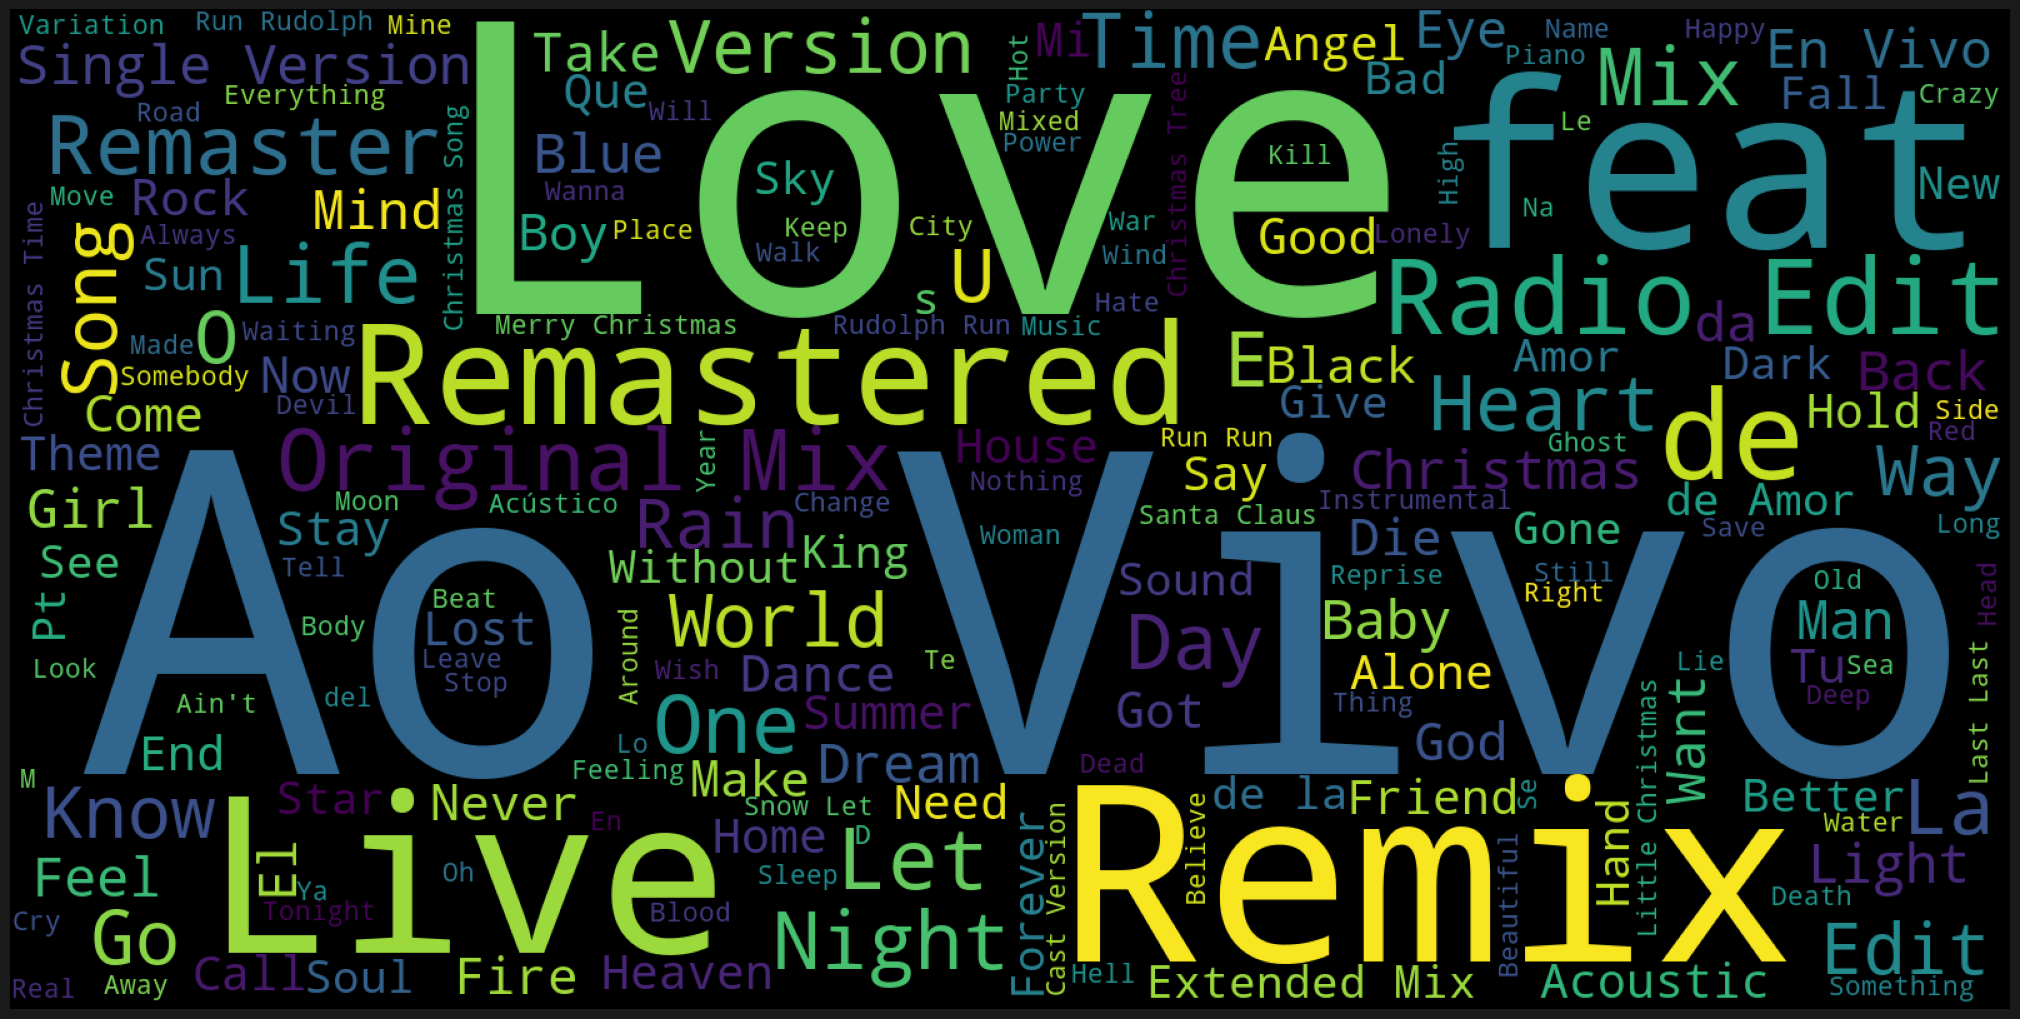

In [941]:
from wordcloud import WordCloud

track_names = " ".join(cat for cat in df.track_name)
track_names

wordcloud = WordCloud(width=1600, height=800).generate(track_names)

# Open a plot of the generated image.
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Correlation Between Data Points

In [942]:
df_final.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,71325.000000,7.132500e+04,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000,71325.000000
mean,33.894245,2.314853e+05,0.558826,0.633527,5.273144,-8.685906,0.631868,0.091047,0.334758,0.192927,0.221237,0.465860,122.045766,3.893221
std,18.276517,1.186369e+05,0.179874,0.260138,3.558717,5.369483,0.482301,0.121306,0.342055,0.337574,0.200035,0.265842,30.281868,0.468496
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.727620e+05,0.446000,0.451000,2.000000,-10.576000,0.000000,0.036200,0.015900,0.000000,0.098500,0.241000,99.221000,4.000000
50%,33.000000,2.150800e+05,0.573000,0.676000,5.000000,-7.323000,1.000000,0.049400,0.199000,0.000101,0.133000,0.453000,122.011000,4.000000
75%,47.000000,2.679600e+05,0.691000,0.857000,8.000000,-5.190000,1.000000,0.088700,0.641000,0.202000,0.286000,0.682000,140.124000,4.000000
max,99.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [943]:
df_final.corr()

/var/folders/ky/9ktznmq57856sfmdt2pzy10m0000gn/T/ipykernel_75158/2875322423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.062768,0.070697,0.097462,-0.005926,0.006496,0.089518,-0.000205,-0.066340,-0.028619,-0.187861,-0.031959,0.028743,-0.004708,0.039232
duration_ms,-0.062768,1.000000,-0.064524,-0.052397,0.062332,0.013608,0.002584,-0.042059,-0.062388,-0.110197,0.111859,0.001240,-0.137331,0.026943,0.027859
explicit,0.070697,-0.064524,1.000000,0.109065,0.101960,0.006279,0.106756,-0.027093,0.345908,-0.080111,-0.120511,0.050538,-0.003844,-0.006291,0.035740
danceability,0.097462,-0.052397,0.109065,1.000000,0.138952,0.033786,0.274279,-0.054420,0.108859,-0.170508,-0.198202,-0.136465,0.503726,-0.000258,0.212452
energy,-0.005926,0.062332,0.101960,0.138952,1.000000,0.044862,0.756230,-0.067487,0.135961,-0.725912,-0.181132,0.190952,0.248845,0.266937,0.183021
key,0.006496,0.013608,0.006279,0.033786,0.044862,1.000000,0.034471,-0.146964,0.014205,-0.044339,-0.003665,-0.003959,0.023029,0.006585,0.015097
loudness,0.089518,0.002584,0.106756,0.274279,0.756230,0.034471,1.000000,-0.033535,0.049542,-0.572542,-0.431723,0.077679,0.294782,0.243647,0.197386
mode,-0.000205,-0.042059,-0.027093,-0.054420,-0.067487,-0.146964,-0.033535,1.000000,-0.031077,0.083515,-0.051643,0.019112,0.028119,-0.003332,-0.022505
speechiness,-0.066340,-0.062388,0.345908,0.108859,0.135961,0.014205,0.049542,-0.031077,1.000000,0.019978,-0.112911,0.243740,0.030704,-0.010206,-0.013668
acousticness,-0.028619,-0.110197,-0.080111,-0.170508,-0.725912,-0.044339,-0.572542,0.083515,0.019978,1.000000,0.085036,-0.012118,-0.095658,-0.228783,-0.170042


/var/folders/ky/9ktznmq57856sfmdt2pzy10m0000gn/T/ipykernel_75158/914086505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True, cmap="Blues")


<AxesSubplot: >

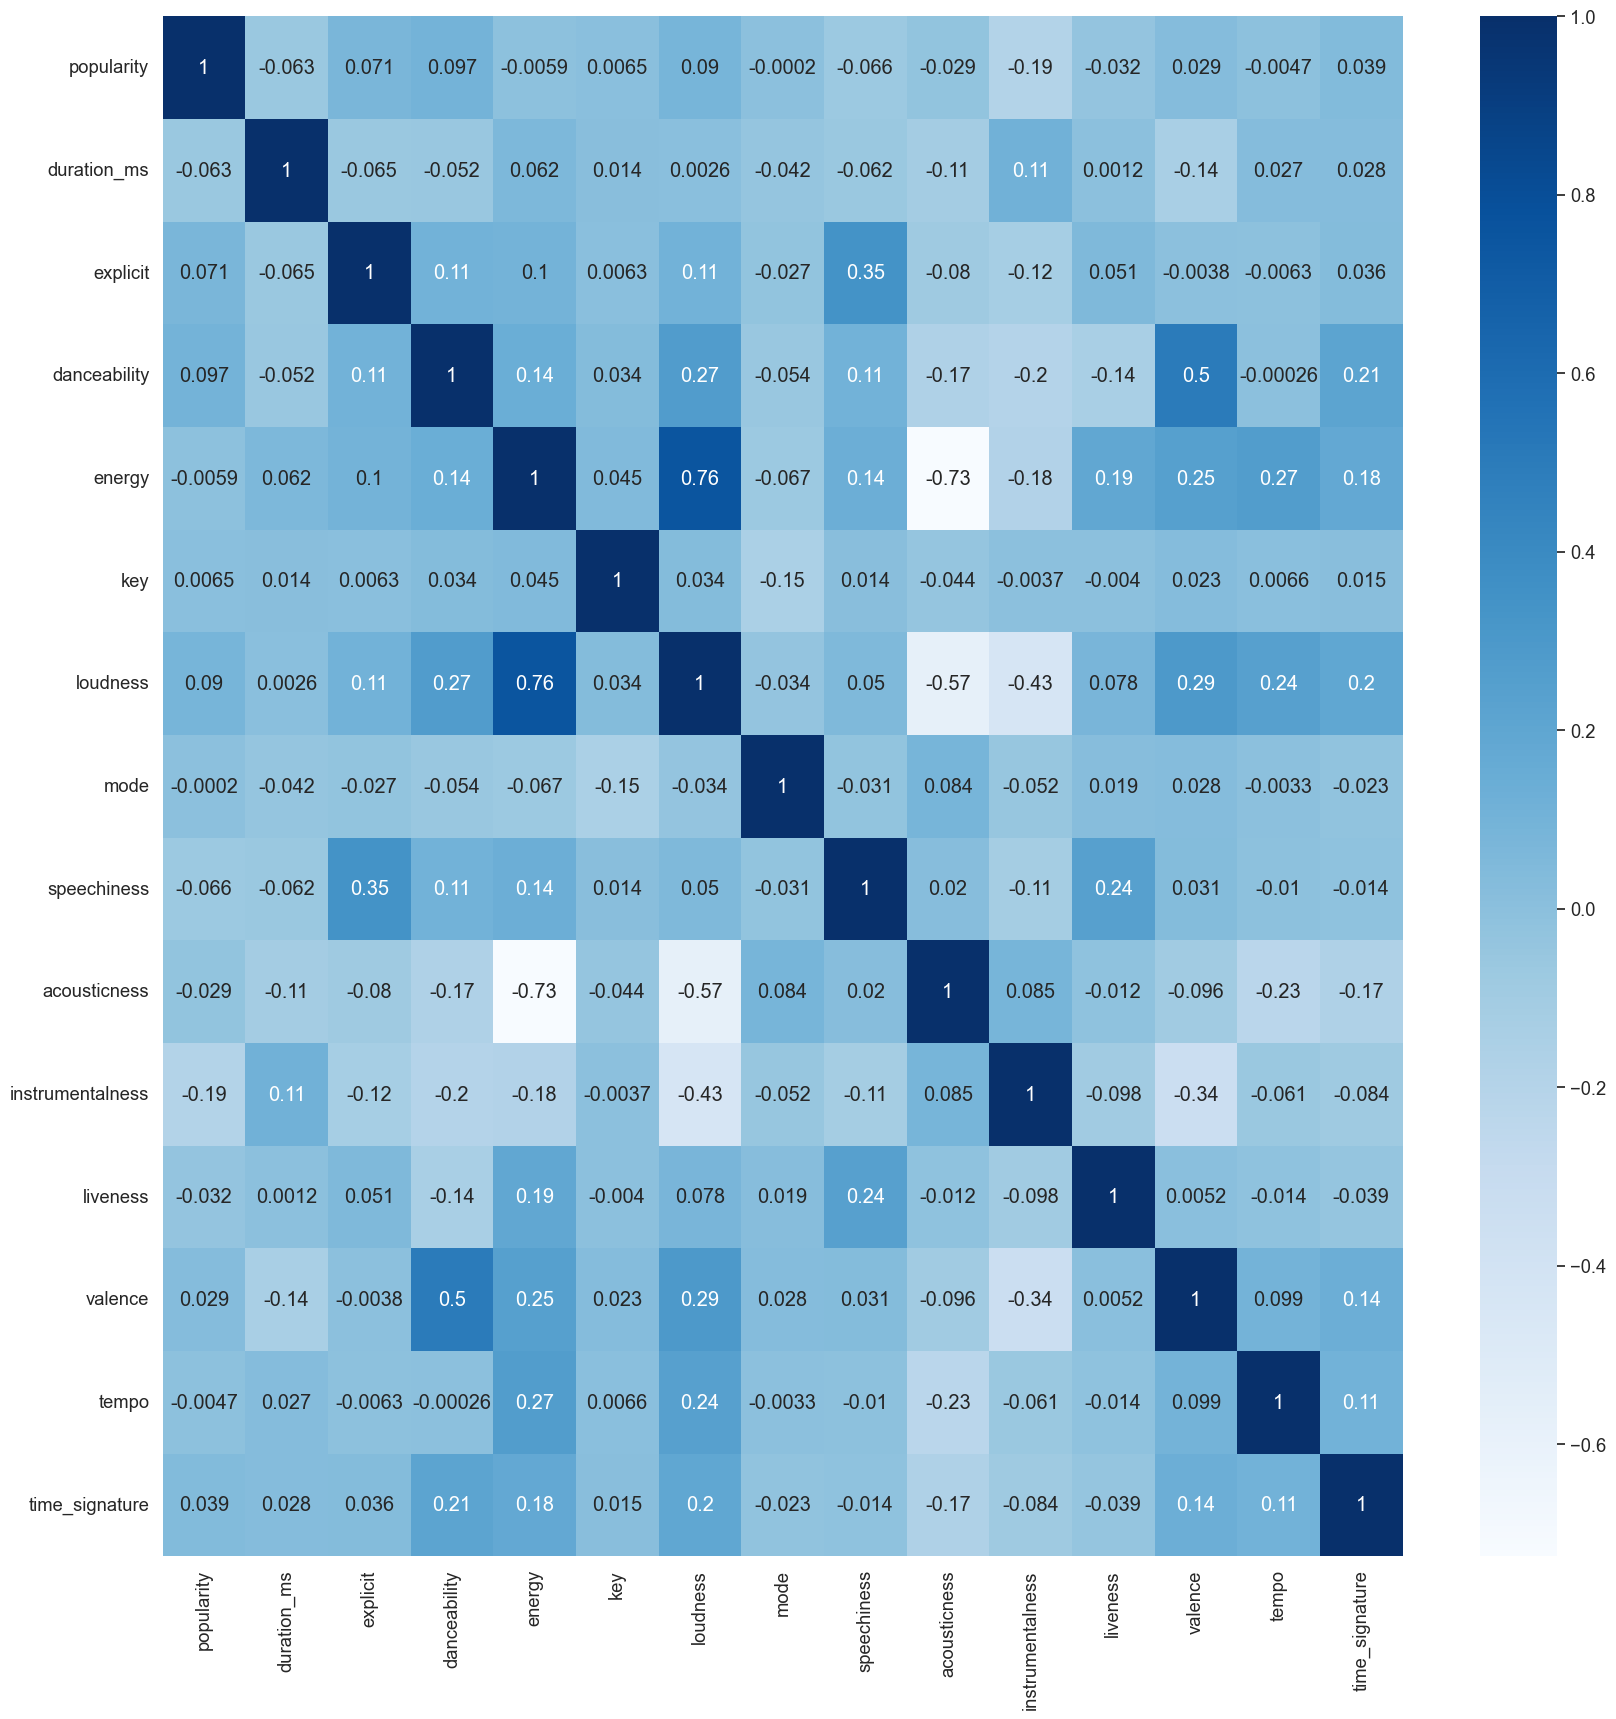

In [944]:

plt.figure(figsize=(20,20))
sns.heatmap(df_final.corr(), annot=True, cmap="Blues")


As we can see from the correlations that energy and loudness are positvely correlated with each other because it makes sense for loud music to be energetic. Similarly, valence is also correlated with danceability because valence represents songs which are happy and cheerful.

Whereas, acoustic is negatively correlated with energy and loudness because acousitcness songs represent characteristics with quietness and careful, calm listening.

<AxesSubplot: xlabel='loudness', ylabel='energy'>

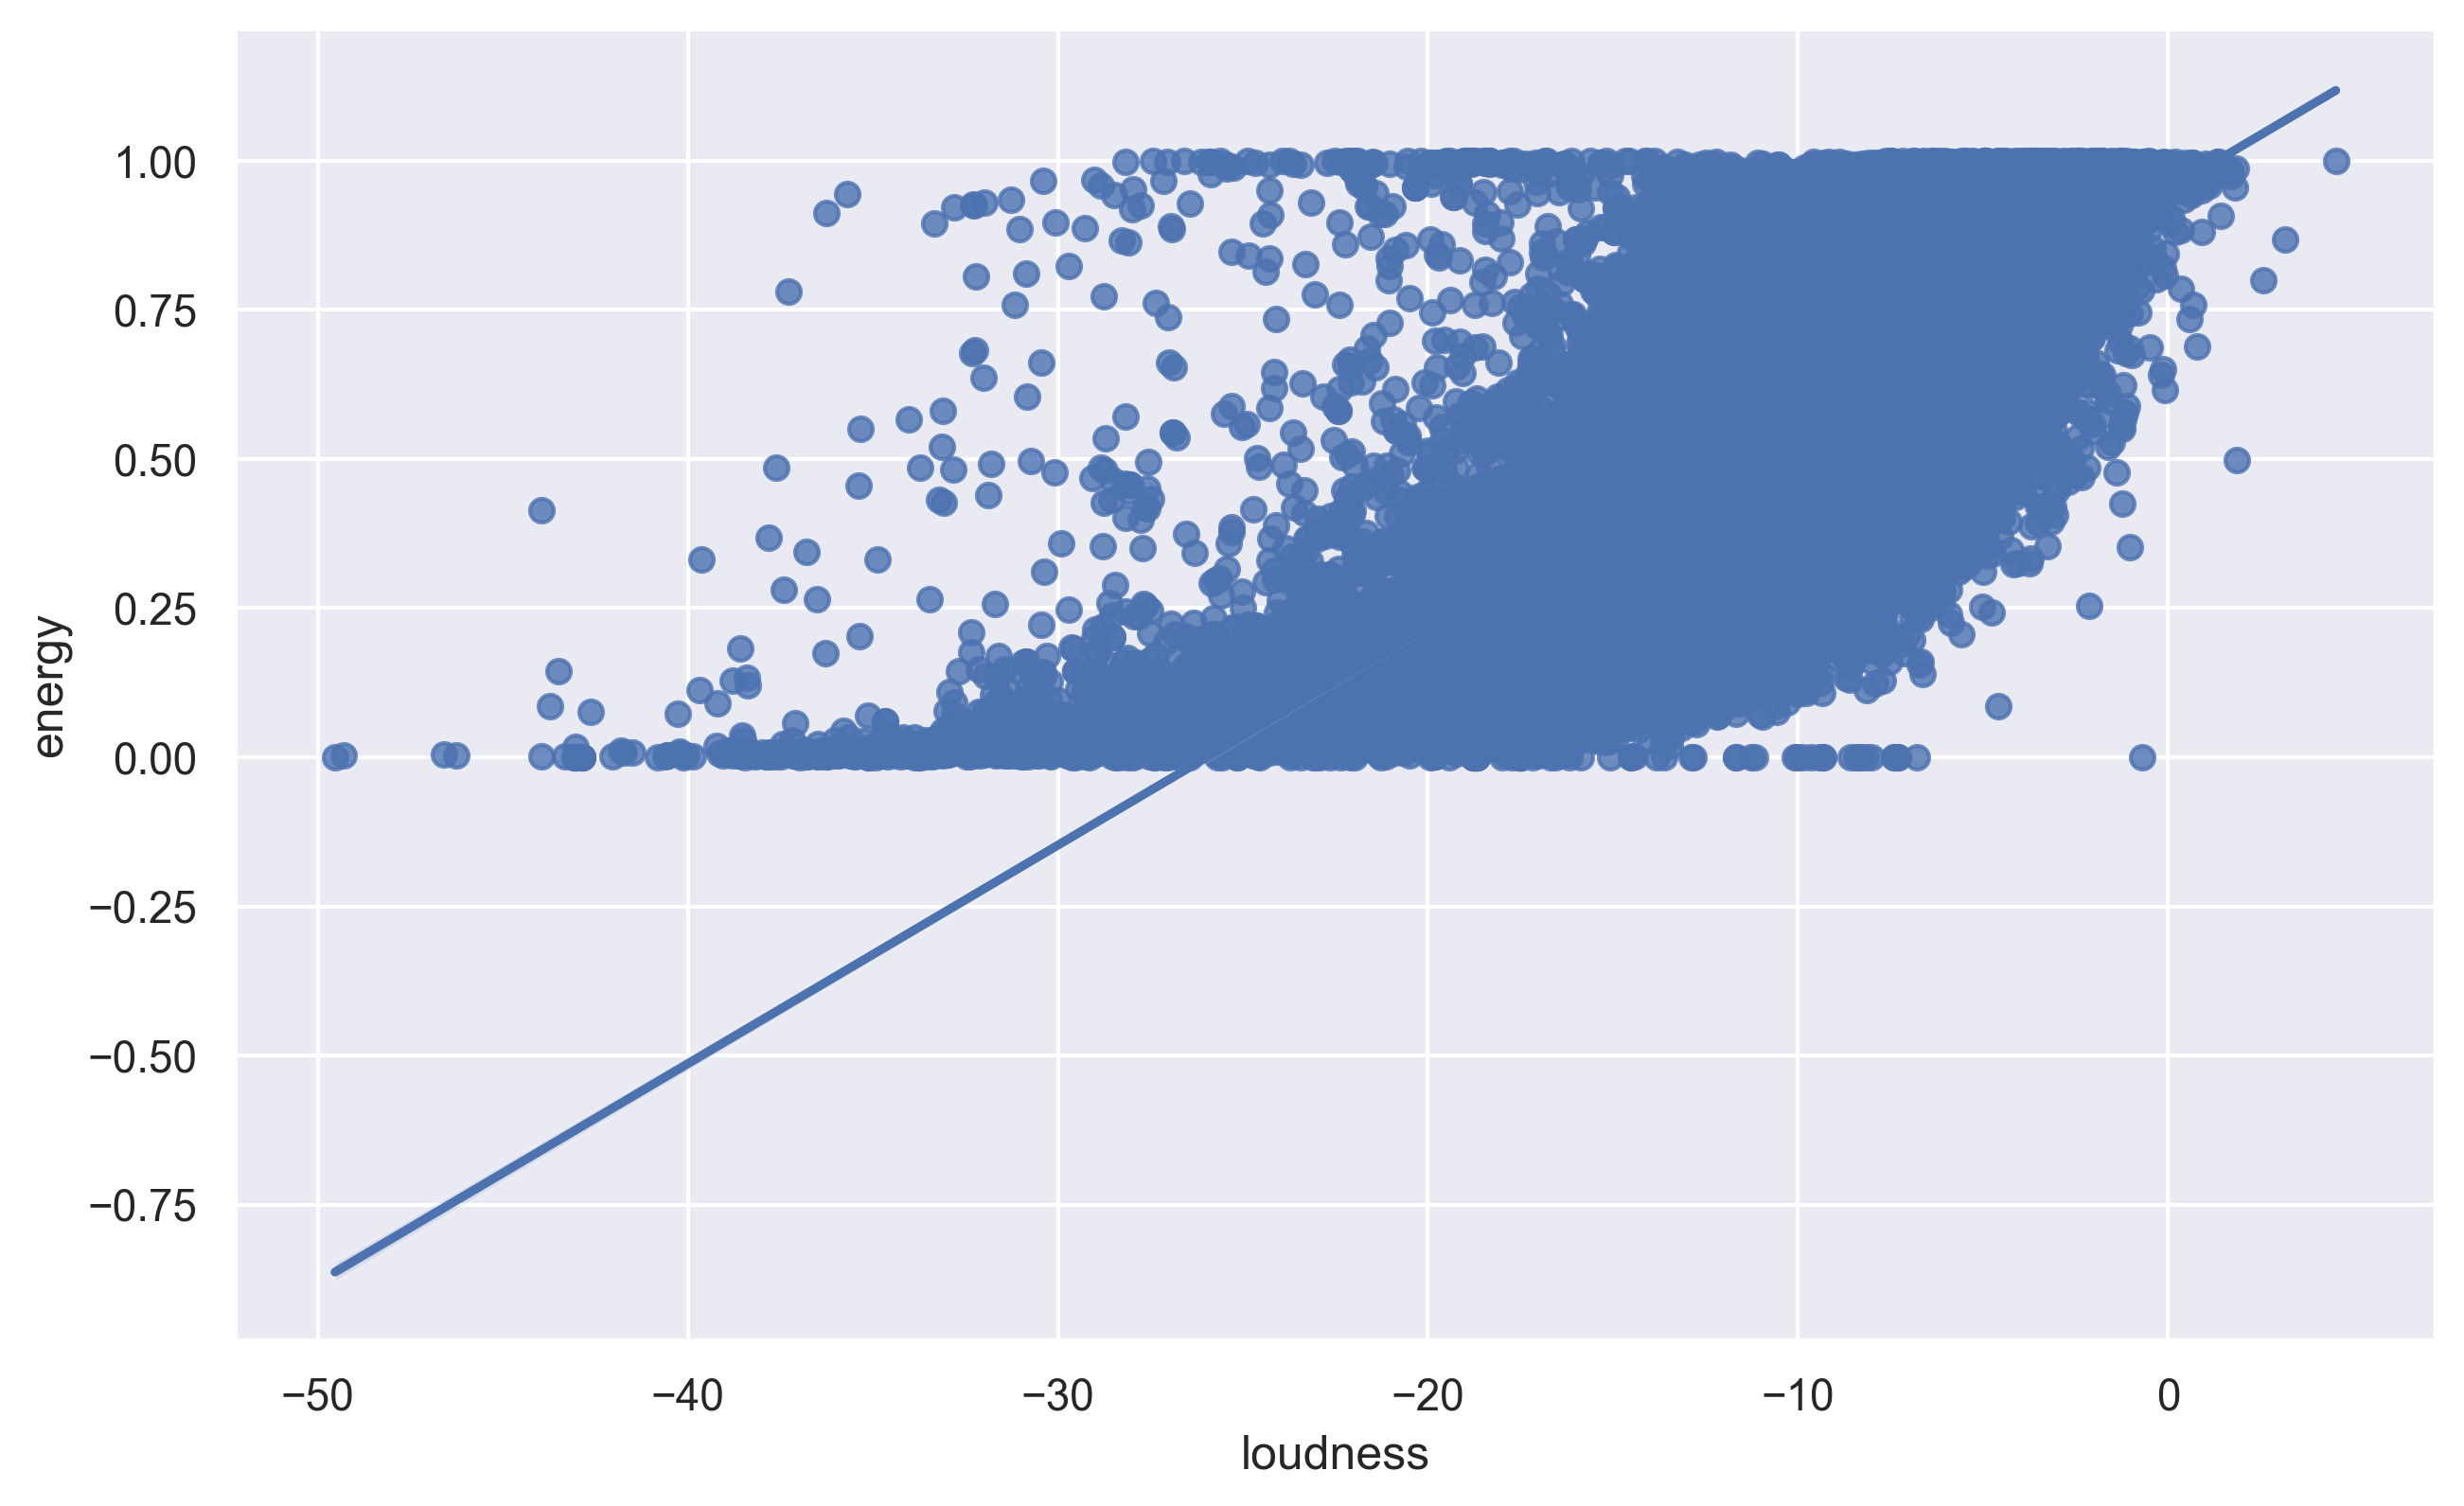

In [945]:
sns.set()
plt.figure(figsize=(10, 6), dpi=300)
sns.regplot(x='loudness', y='energy', data=df_final)

<AxesSubplot: xlabel='loudness', ylabel='popularity'>

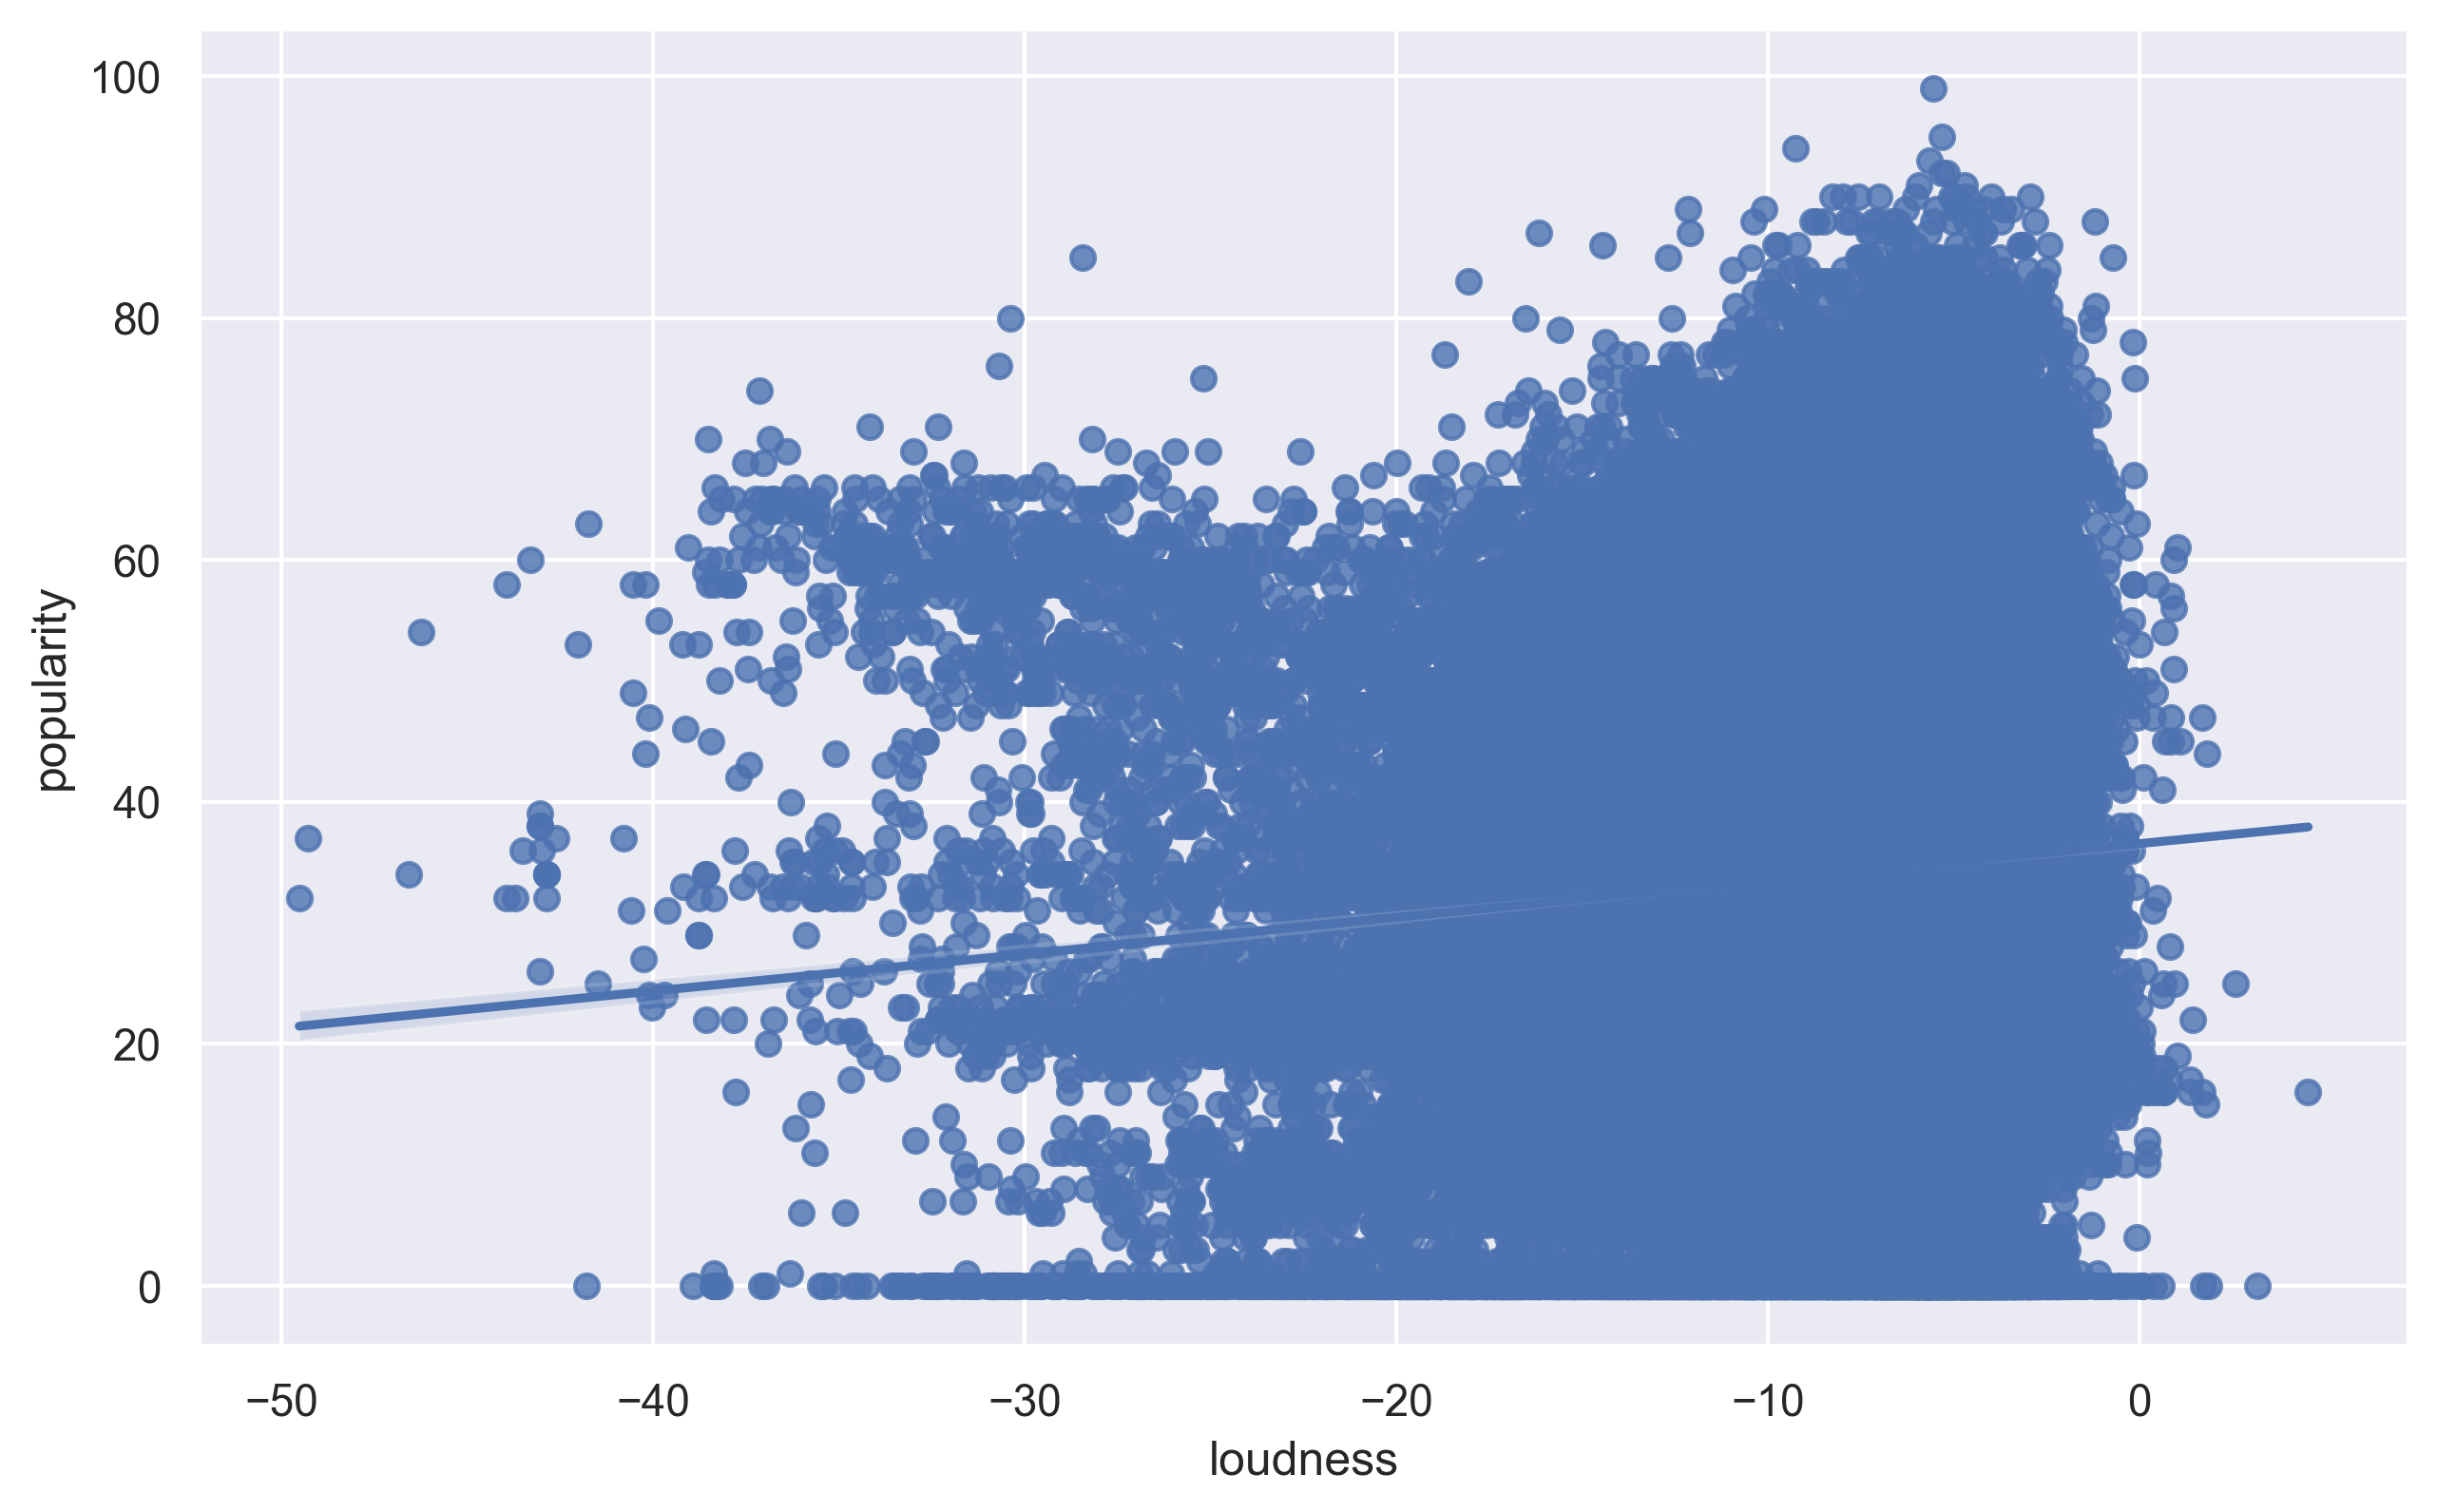

In [946]:
sns.set()
plt.figure(figsize=(10, 6), dpi=300)
sns.regplot(x='loudness', y='popularity', data=df_final)


Here, we can see that the more the loud music, the more popular it can be.

In [958]:
# Filtering top 10 indian songs
indian = df[df['track_genre'].str.contains("indian")]
top20_indian = indian.sort_values(by='popularity', ascending=False)[:10]
top20_indian[['artists', 'album_name', 'track_name', 'popularity']]

,artists,album_name,track_name,popularity
55001,Pritam;Arijit Singh;Amitabh Bhattacharya,"Kesariya (From ""Brahmastra"")","Kesariya (From ""Brahmastra"")",88
55008,Pritam;Arijit Singh;Amitabh Bhattacharya;Jonit...,"Deva Deva (From ""Brahmastra"")","Deva Deva (From ""Brahmastra"")",79
55031,Jasleen Royal;B Praak;Romy;Anvita Dutt,"Ranjha (From ""Shershaah"")","Ranjha (From ""Shershaah"")",77
55016,Anuv Jain,Baarishein,Baarishein,76
55030,Pritam;Arijit Singh,Chhichhore,Khairiyat,75
55017,Kanishk Seth;Kavita Seth,"Rangisari (From ""Jugjugg Jeeyo"")","Rangisari (From ""Jugjugg Jeeyo"")",75
55007,Pritam;Mohit Chauhan,Jab We Met,Tum Se Hi,74
55032,Pritam;Arijit Singh;Amitabh Bhattacharya,"Dance Ka Bhoot (From ""Brahmastra"")","Dance Ka Bhoot (From ""Brahmastra"")",74
55011,Pritam;Shreya Ghoshal;TUSHAR JOSHI,"Rasiya (From ""Brahmastra"")","Rasiya (From ""Brahmastra"")",74
55015,Pritam;Arijit Singh,Love Aaj Kal (Original Motion Picture Soundtrack),Shayad,74


### There are 114 different track genres present in the dataset

In [947]:
df['track_genre'].nunique()

114

Since there are 114 unique different track genres, we should move ahead with removing track genre column as well.

In [948]:
# All genres
all_genres = df['track_genre'].unique().tolist()
", ".join(all_genres)

'acoustic, afrobeat, alt-rock, alternative, ambient, anime, black-metal, bluegrass, blues, brazil, breakbeat, british, cantopop, chicago-house, children, chill, classical, club, comedy, country, dance, dancehall, death-metal, deep-house, detroit-techno, disco, disney, drum-and-bass, dub, dubstep, edm, electro, electronic, emo, folk, forro, french, funk, garage, german, gospel, goth, grindcore, groove, grunge, guitar, happy, hard-rock, hardcore, hardstyle, heavy-metal, hip-hop, honky-tonk, house, idm, indian, indie-pop, indie, industrial, iranian, j-dance, j-idol, j-pop, j-rock, jazz, k-pop, kids, latin, latino, malay, mandopop, metal, metalcore, minimal-techno, mpb, new-age, opera, pagode, party, piano, pop-film, pop, power-pop, progressive-house, psych-rock, punk-rock, punk, r-n-b, reggae, reggaeton, rock-n-roll, rock, rockabilly, romance, sad, salsa, samba, sertanejo, show-tunes, singer-songwriter, ska, sleep, songwriter, soul, spanish, study, swedish, synth-pop, tango, techno, tranc

In [949]:
df_final = df_final.drop(columns = ['track_genre'])
df_final

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4
8,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4
10,74,244800,False,0.627,0.3630,8,-8.127,1,0.0291,0.279,0.000000,0.0928,0.3010,99.905,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.381,0.000000,0.2700,0.4130,135.960,4


### Convert explicit boolean to int

In [950]:
df_final.explicit = df_final.explicit.apply(lambda x: 1 if x else 0)
df_final

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4
8,74,189613,0,0.625,0.4140,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4
10,74,244800,0,0.627,0.3630,8,-8.127,1,0.0291,0.279,0.000000,0.0928,0.3010,99.905,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.381,0.000000,0.2700,0.4130,135.960,4


---

## Modelling

### Split the Dataset into Training and Test Sets

In [951]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['popularity'])
X = df_final[['loudness', 'acousticness', 'instrumentalness', 'energy', 'speechiness']]
y = df_final['popularity']

x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of  train sample in train set:",x_train.shape)
print("Number of samples in validation set:",y_test.shape)

Number of  train sample in train set: (57060, 5)
Number of samples in validation set: (14265,)


In [952]:
total = df.shape[0]
pop_40 = df[df['popularity'] > 40].shape[0]
probability = (pop_40/total)*100
print("Probability of song getting more than 40 in popularity is just %.2f"  % probability)

Probability of song getting more than 40 in popularity is just 40.94


## Important features


Important features
____________________________________________________________
86.68


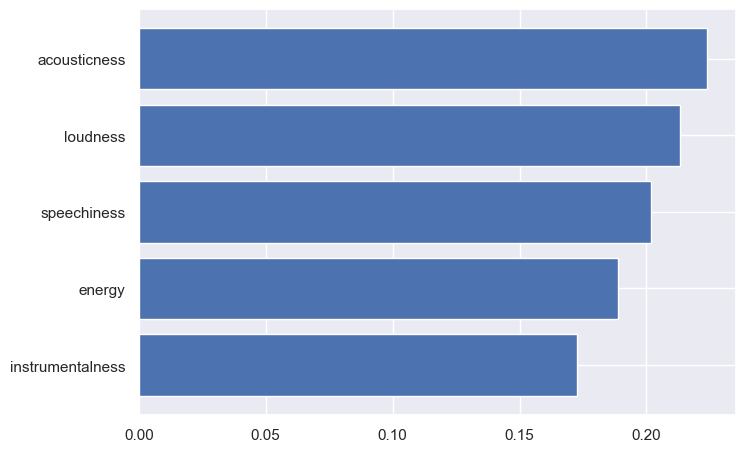

In [953]:
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)


### Applying Linear Regression Model

In [954]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# remove features not so important from RandomForestRegressor
X = df_final.drop(columns=['popularity', 'explicit', 'key', 'mode', 'time_signature'])
X = df_final[['loudness', 'acousticness', 'instrumentalness', 'energy', 'speechiness']]
y = df_final['popularity']

x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build the model
model_lr =  LinearRegression()   # create linear regression object
model_lr.fit(x_train, y_train)  # fit the model using the Training Data
predictions = model_lr.predict(x_test)

In [955]:
train_output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

### Calculating Performance metrics

In [956]:
print("R^2 in Training Set:", model_lr.score(x_train, y_train))
print("R^2 in Test Set:", model_lr.score(x_test, y_test))
rmse = mean_squared_error(y_test, predictions)**0.5
print ('RMSE: ', rmse)

R^2 in Training Set: 0.04837672108512636
R^2 in Test Set: 0.049011046622805754
RMSE:  17.888957360487066


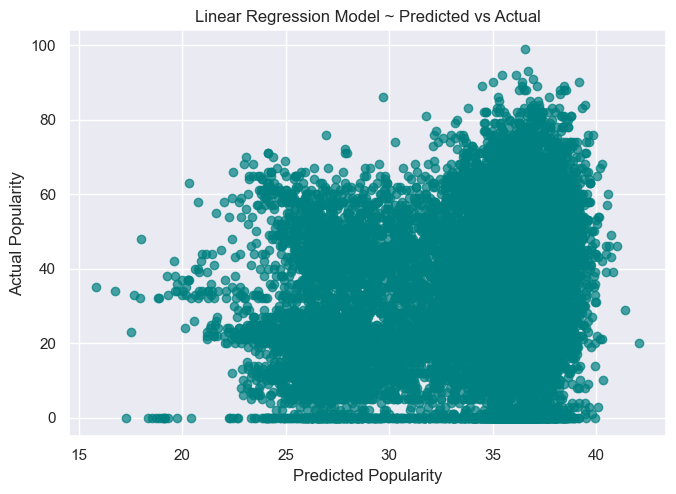

In [957]:
# Plot the prediction vs actual

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=0.7, color='teal')
plt.xlabel('Predicted Popularity')
plt.ylabel('Actual Popularity')
plt.title("Linear Regression Model ~ Predicted vs Actual")
plt.show()

### Regression Modeling and Evaluation

In [959]:
from xgboost import XGBRegressor
from sklearn import linear_model, tree
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [960]:
XGBreg = XGBRegressor(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=1)
ridge_model = linear_model.Ridge(alpha=.5)
lasso_model = linear_model.Lasso(alpha =.1)
dtr = tree.DecisionTreeRegressor()
bayridge_model = linear_model.BayesianRidge()
poly_list = [PolynomialFeatures(degree=i, include_bias=False) for i in range(2,8)]
prm_list = [linear_model.LinearRegression() for i in range(2,8)]

In [961]:
from datetime import datetime
def model_metrics(model, X_test, y_test, decimals = 5, X_train = x_train, y_train = y_train):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.round(mean_squared_error(y_test, y_pred),decimals)
    r2 = np.round(r2_score(y_test, y_pred),decimals)
    return {'mean_squared_error': mse, 'R-Squared': r2, 'time': (datetime.now() - start).seconds}

In [962]:
from sklearn.metrics import mean_squared_error, r2_score

results = pd.DataFrame(
    [
        model_metrics(ridge_model, x_test, y_test),
        model_metrics(lasso_model, x_test, y_test),
        model_metrics(XGBreg, x_test, y_test),
        model_metrics(dtr, x_test, y_test),
        model_metrics(bayridge_model, x_test, y_test),
    ], 
    index = ['XGBRegressor', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'BayesianRidge']) \
.reset_index() \
.rename(columns={'index':'model'})


Text(0.5, 1.0, 'Model Performance based on R-Squared')

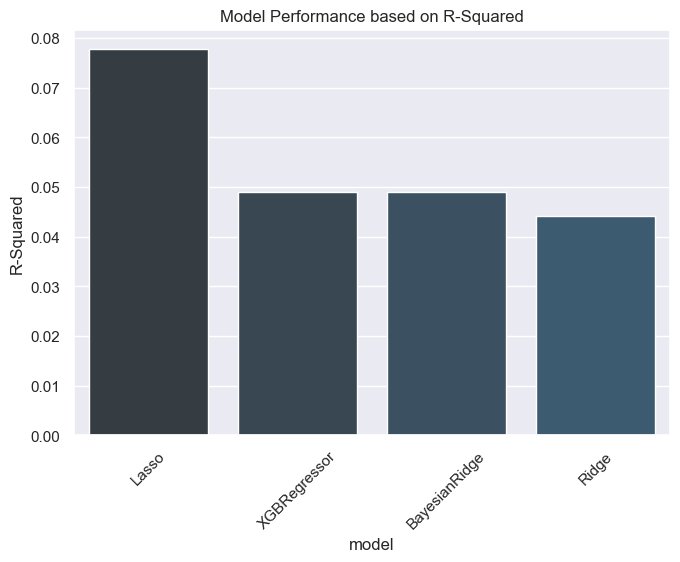

In [963]:
results = results[results['R-Squared'] >= 0] # decision tree is removed here
results = results.sort_values('R-Squared', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['R-Squared'], palette=palette).set_title('Model Performance based on R-Squared')


In [964]:
results.sort_values(['mean_squared_error', 'R-Squared', 'time'],
              ascending = [True, False, True])


,model,mean_squared_error,R-Squared,time
2,Lasso,310.32760,0.07780,17
0,XGBRegressor,320.01504,0.04901,0
4,BayesianRidge,320.01735,0.04900,0
1,Ridge,321.66368,0.04411,0


We can see that even the well performing model, Lasso has relatively very low R-squared which suggests that even though some of the data points are correlated with popularity but can be problematic to precisely predict the value of popularity based on these correlated data points and from above R2 squared.

### Classifier Models

In [965]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier #KNN
from xgboost import XGBClassifier #XGB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from statistics import mean
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline

df_final['is_popular'] = df['popularity'].apply(lambda x: 1 if x > 50 else 0)

y = df_final['is_popular']
X = df_final.drop(columns=['popularity', 'explicit', 'key', 'mode', 'time_signature', 'is_popular', 'duration_ms'])

x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2,0.438,0.3590,-9.734,0.0557,0.210,0.000000,0.1170,0.1200,76.332
3,0.266,0.0596,-18.515,0.0363,0.905,0.000071,0.1320,0.1430,181.740
4,0.618,0.4430,-9.681,0.0526,0.469,0.000000,0.0829,0.1670,119.949
8,0.625,0.4140,-8.700,0.0369,0.294,0.000000,0.1510,0.6690,130.088
10,0.627,0.3630,-8.127,0.0291,0.279,0.000000,0.0928,0.3010,99.905
...,...,...,...,...,...,...,...,...,...
113995,0.172,0.2350,-16.393,0.0422,0.640,0.928000,0.0863,0.0339,125.995
113996,0.174,0.1170,-18.318,0.0401,0.994,0.976000,0.1050,0.0350,85.239
113997,0.629,0.3290,-10.895,0.0420,0.867,0.000000,0.0839,0.7430,132.378
113998,0.587,0.5060,-10.889,0.0297,0.381,0.000000,0.2700,0.4130,135.960


In [966]:
#3. Fit the model into the training set


names = ["Naive Bayes", "KNN", "Decision Tree", "Random Forest", "Ada BOOST", "XGBOOST"]

# List the variable to hold classification scores

scores = []

clfs = [
    GaussianNB(),
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth = 5),
     RandomForestClassifier(n_estimators = 500, max_depth = 5, max_leaf_nodes = 8),
     AdaBoostClassifier(),
     XGBClassifier(use_label_encoder=False)
    
]

pipes = []

kfold = KFold(n_splits = 2)


for clf in clfs:
    pipe = Pipeline(steps = [('classifier', clf)])

    print(cross_val_score(pipe, x_train, y_train, cv = kfold ))
   
    score=mean(cross_val_score(pipe, x_train, y_train, cv = kfold ))
    
    pipes.append(pipe)
    print(clf)
    
    scores.append(score)
    print("Model Score: %.3f" % (score * 100))
    print("\n--------------------------------------------------------------")
    

[0.79033163 0.792941  ]
GaussianNB()
Model Score: 79.164

--------------------------------------------------------------
[0.75316858 0.75248635]
KNeighborsClassifier()
Model Score: 75.283

--------------------------------------------------------------
[0.79687442 0.79679204]
DecisionTreeClassifier(max_depth=5)
Model Score: 79.687

--------------------------------------------------------------


As we can see that we got higher score in classifier modeling from Decision Tree Classifier: 79.637

In [967]:
from sklearn.metrics import confusion_matrix


dt_clf = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)


In [968]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[14067   107]
 [ 3548   110]]


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

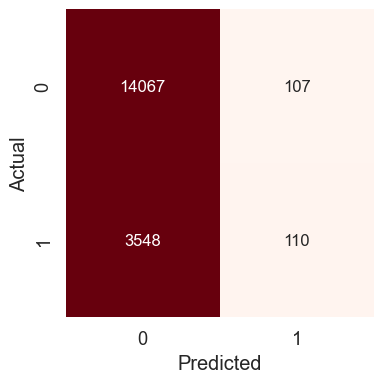

In [969]:
# Generate a seaborn heatmap for the confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns = np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)   #for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size


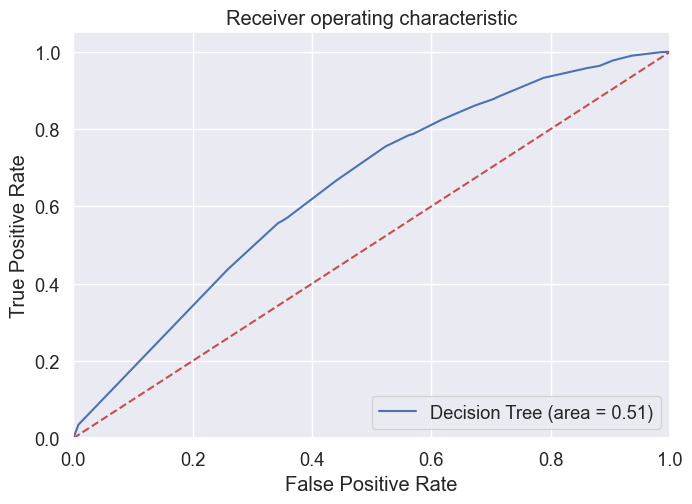

In [970]:
# Generate the ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test, dt_clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_clf.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label ='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc ="lower right")
plt.show()


# Display Classification Report


In [971]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     14174
           1       0.51      0.03      0.06      3658

    accuracy                           0.80     17832
   macro avg       0.65      0.51      0.47     17832
weighted avg       0.74      0.80      0.72     17832



# Out of Sample Predictions

In [972]:


# Predict whether based on following song feature, it will be popular or not with the selected model

d = {
    'danceability': [0.838, 0.733, 0.876, 0.123],
    'energy':[0.8590, 0.8575, 0.6544, 0.7484],
    'loudness': [-4.734, -8.318, -1.888, -6.444],
    'speechiness': [3939.4002, 0.401, 0.297, 0.072],
    'acousticness': [0.510, 0.93, 0.74, 0.445],     
    'instrumentalness': [0.900, 0.001, 0.828, 0.974],
    'liveness': [0.1170, 0.328, 0.383, 0.873],
    'valence': [0.1200, 0.093, 0.334, 0.394],
    'tempo': [189.12, 119.94, 79.19, 135.96]
}

new_df=pd.DataFrame(data=d)
new_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.838,0.8590,-4.734,3939.4002,0.510,0.900,0.117,0.120,189.12
1,0.733,0.8575,-8.318,0.4010,0.930,0.001,0.328,0.093,119.94
2,0.876,0.6544,-1.888,0.2970,0.740,0.828,0.383,0.334,79.19
3,0.123,0.7484,-6.444,0.0720,0.445,0.974,0.873,0.394,135.96


In [973]:
y_pred = dt_clf.predict(new_df)
pred_prob_y = dt_clf.predict_proba(new_df)

In [974]:
def display_predicted_class(y_pred):
    label =''
    if y_pred == 1:
        label = '"yes"'
    else:
        label = '"no"'   
    print('Predicted value for popularity : ', y_pred,', which means ', label)  
    
def display_predicted_probability(y_pred, pred_prob):
    prob_label = ''
    prob = 0
    if y_pred == 1:
        prob_label = '", which mean the probability of yes is : '
        prob = pred_prob[1]
     
    else:
        prob_label = '", which mean the probability of no is: '
        prob = pred_prob[0]

    print('Predicted probability is %.3f' % prob)

for i in range(new_df.shape[0]):    
    display_predicted_class(y_pred[i])
    display_predicted_probability(y_pred[i], pred_prob_y[i])



Predicted value for popularity :  0 , which means  "no"
Predicted probability is 0.904
Predicted value for popularity :  0 , which means  "no"
Predicted probability is 0.907
Predicted value for popularity :  0 , which means  "no"
Predicted probability is 0.904
Predicted value for popularity :  0 , which means  "no"
Predicted probability is 0.904


From the analysis, it seems that in order for a song to be popular is quite hard and not every feature of song can be easily matched to make a song popular.